<a href="https://colab.research.google.com/github/nazlicanalagoz/DataScience_Uni/blob/main/7_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd # dataframe manipülasyon işlemleri
import numpy as np # vektörel ve matris işlemleri
import seaborn as sns # görselleştirme
import matplotlib.pyplot as plt # görselleştirme
from sklearn.datasets import load_iris
from sklearn import cluster
#from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score # performans

In [ ]:
iris = load_iris()
x,y= load_iris(return_X_y=True)   # x özellikleri/ öznitelikleri gösterir. y ise çıktı/hedefi gösterir

In [ ]:
x.shape  # kaç gözlem ve öznitelik var

(150, 4)

In [ ]:
x

In [ ]:
iris.feature_names # öznitelik isimleri

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names  #hedef değer isimlerimiz

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# Stilli Grafik Oluşturma
plt.style.use('ggplot')

Text(0, 0.5, 'sepal width (cm)')

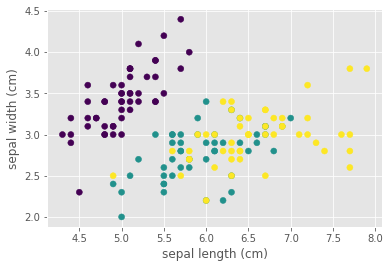

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


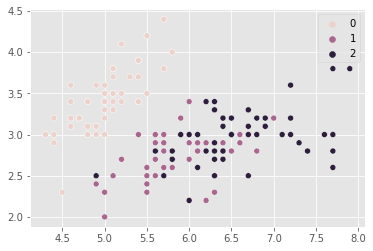

In [ ]:
# Seaborn Görselleştirme
sns.scatterplot(x[:,0],x[:,1],hue=y)

In [ ]:
# kümeleme algoritmasını seç ve küme sayısını belirlememiz
kmeans= cluster.KMeans(n_clusters=3, random_state=42)   #  3 küme, 42 de diğer çalışmalarda aynı sonuç çıkması için

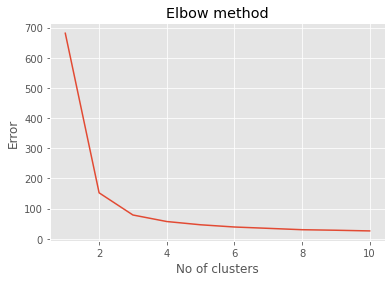

In [ ]:
# Elbow Methodu
# Küme sayısının daha doğru tespiti için kullanılıyor.
Error =[]
for i in range(1, 11):
    kmeans = cluster.KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans.fit_predict(x)   # öznitelikleri uyumlaştırma

array([9, 1, 1, 1, 9, 5, 1, 9, 1, 1, 5, 9, 1, 1, 5, 5, 5, 9, 5, 9, 9, 9,
       1, 9, 9, 1, 9, 9, 9, 1, 1, 9, 5, 5, 1, 1, 9, 9, 1, 9, 9, 1, 1, 9,
       9, 1, 9, 1, 9, 9, 3, 3, 3, 2, 3, 2, 3, 7, 3, 2, 7, 2, 2, 3, 2, 3,
       2, 2, 3, 2, 8, 2, 8, 3, 3, 3, 3, 3, 3, 7, 2, 7, 2, 8, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 7, 2, 2, 2, 3, 7, 2, 4, 8, 0, 4, 4, 6, 2, 0, 0, 6,
       4, 8, 4, 8, 8, 4, 4, 6, 6, 8, 4, 8, 6, 8, 4, 0, 8, 8, 4, 0, 0, 6,
       4, 8, 8, 6, 4, 4, 8, 4, 4, 4, 8, 4, 4, 4, 8, 4, 4, 8], dtype=int32)

In [ ]:
# Kümelerin orta noktasını bulma     Her bir elemanın kümenin orta noktasına olan uzaklığını verir
kmeans.cluster_centers_.round(2)  # virgülden sonra 2 basamak yuvarla   

array([[7.15, 2.9 , 5.98, 1.83],
       [4.68, 3.08, 1.38, 0.2 ],
       [5.62, 2.71, 4.12, 1.29],
       [6.43, 2.94, 4.59, 1.44],
       [6.56, 3.11, 5.52, 2.18],
       [5.51, 4.  , 1.47, 0.28],
       [7.64, 3.23, 6.5 , 2.2 ],
       [5.2 , 2.37, 3.38, 1.02],
       [6.03, 2.73, 5.03, 1.79],
       [5.1 , 3.51, 1.53, 0.27]])

In [ ]:
# x verilerini hangi kümelere aktarmışız
kmeans.labels_   

array([9, 1, 1, 1, 9, 5, 1, 9, 1, 1, 5, 9, 1, 1, 5, 5, 5, 9, 5, 9, 9, 9,
       1, 9, 9, 1, 9, 9, 9, 1, 1, 9, 5, 5, 1, 1, 9, 9, 1, 9, 9, 1, 1, 9,
       9, 1, 9, 1, 9, 9, 3, 3, 3, 2, 3, 2, 3, 7, 3, 2, 7, 2, 2, 3, 2, 3,
       2, 2, 3, 2, 8, 2, 8, 3, 3, 3, 3, 3, 3, 7, 2, 7, 2, 8, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 7, 2, 2, 2, 3, 7, 2, 4, 8, 0, 4, 4, 6, 2, 0, 0, 6,
       4, 8, 4, 8, 8, 4, 4, 6, 6, 8, 4, 8, 6, 8, 4, 0, 8, 8, 4, 0, 0, 6,
       4, 8, 8, 6, 4, 4, 8, 4, 4, 4, 8, 4, 4, 4, 8, 4, 4, 8], dtype=int32)

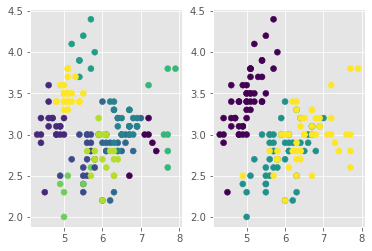

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(121)  # 1 satır 2 sütun
ax.scatter(x[:,0],x[:,1],c=kmeans.labels_) #kmeans sonucu kümeleme  # [:,0] >> tüm satırları ve 0. sütunu al

ax=fig.add_subplot(122)  #1 satır 2 sütun ayır 2.sini çiz
ax.scatter(x[:,0],x[:,1],c=y)   # gerçek kümeleme

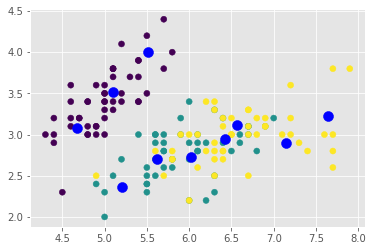

In [ ]:
plt.scatter(x[:,0],x[:,1],c=y)  # gerçek kümeleme
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue')  # küme orta nokta merkezleri

In [ ]:
# Performans ölçümü (doğruluk Skoru)
accuracy_score(y,kmeans.labels_)

0.006666666666666667

**Support Vector Machine (SVM)**

In [ ]:
# Modül ekleme
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn import svm, datasets
from sklearn import svm    # destek vektör makinaları
from sklearn.model_selection import train_test_split  # veri setini eğitim ve test olarak ayırmak için
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report)

In [ ]:
# veri seti yükleme
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
iris_x,iris_y = datasets.load_iris(return_X_y=True)  # öznitelik (x) dizi olarak almamızı sağlıyor, y hedef(çıktı)

In [ ]:
# sklearn ile yüklenen dosya verilerini dataframe dönüştürme
df= pd.DataFrame(iris.data)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris_x

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# SVM MODELİNİ ÇAĞIR
iris_model= svm.SVC()

In [ ]:
iris_model.fit(iris_x, iris_y)  #iris modelini eğitiyoruz

SVC()

In [ ]:
iris_x[3]  #3.satırı ver

array([4.6, 3.1, 1.5, 0.2])

In [ ]:
iris_y[3]

0

In [ ]:
iris.target_names[iris_y[3]]

'setosa'

In [ ]:
y_tahmin = iris_model.predict(iris_x[3].reshape(1,-1))    # predict model tahmini için kullanılır
y_tahmin

array([0])

**Veri Seti %80 eğitim ve %20 test olarak bölme işlemi**

In [ ]:
iris_x_egitim,iris_x_test, iris_y_egitim, iris_y_test = train_test_split(iris_x,iris_y,test_size=0.2, random_state=42)

In [ ]:
iris_y_predicted= iris_model.predict(iris_x_test)

In [ ]:
accuracy_score(iris_y_test,iris_y_predicted)

1.0

In [ ]:
iris_y_predicted= iris_model.predict(iris_x)

In [ ]:
accuracy_score(iris_y,iris_y_predicted)

0.9733333333333334

In [ ]:
# Confusion Matris
confusion_matrix(iris_y,iris_y_predicted)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  2, 48]])